# Práctica 6c: estadísticas de validación de clústers

##### Cookbook [@data_mining_2020](https://nbviewer.jupyter.org/github/JacoboGGLeon/data_mining_2020/blob/master/README.ipynb)

## Resources
* [Chapter 13 Cluster Validation Statistics](https://drive.google.com/open?id=1aZ9PZ-ohlwQMgaz8uqFu0idOIXF85sRP)


## Recipe

El término *validación de clústers* se utiliza para diseñar la evaluación de los resultados de los algoritmos de clustering. Este paso es importante para evitar encontrar patrones en un dato aleatorio, así como comparar dos algoritmos de clustering.
En general, las estadísticas de validación de agrupaciones pueden clasificarse en 3 clases:
1. **Validación interna**, utiliza la información interna del proceso de agrupación para evaluar la estructura del clustering sin referencia a la información externa (variable label/class/target).
2. **Validación externa**, que consiste en comparar los resultados de un análisis de clúster con un resultado conocido externamente, como las etiquetas de clase proporcionadas externamente. Mide hasta qué punto las etiquetas de clúster coinciden con las etiquetas de clase suministradas externamente. Dado que conocemos el "verdadero" número de clúster por adelantado, este enfoque se utiliza principalmente para seleccionar el algoritmo de clúster adecuado para un conjunto de datos específico.
3. **Validación relativa**, a través de una heruística evalúa la estructura de los clústers variando los valores de los diferentes parámetros para el mismo algoritmo (por ejemplo, variando el número de clústers k). Generalmente se usa para determinar el número óptimo de clusters.

### Medidas internas para la validación de clústers

Recordando que el objetivo de los algoritmos de clustering de partición (k-means por ejemplo) es dividir el conjunto de datos en clústers de objetos, de tal manera que:
* los objetos del mismo clúster sean lo más similares posible, 
* y los objetos entre clústeres diferentes sean muy distintos

Las medidas de validación interna reflejan a menudo la *compacidad*, la *conexión* y la *separación* de las particiones del clúster:

* Compactación o cohesión, mide cuán cerca están los objetos dentro del mismo clúster. Una menor variación dentro del clúster es un indicador de una buena compactación (es decir, una buena agrupación). Los diferentes índices para evaluar la compacidad de los clústers se basan en medidas de distancia, como las distancias medias entre observaciones.
* Separación, mide cuán bien separado está un clúster de otros clústers. Los índices utilizados como medidas de separación incluyen:
    - distancias entre los centros de los clústers
    - las distancias mínimas por pares entre los objetos de los distintos clústers
* Conectividad, corresponde a la medida en que los elementos se colocan en el mismo clúster que sus vecinos más cercanos en el espacio de datos. La conectividad tiene un valor entre 0 e infinito y debe ser minimizada.


Generalmente, la mayoría de los índices utilizados para la validación interna de los clústers combinan medidas de *compactación* y *separación* como se indica a continuación:

$$\mbox{index}=\frac{\alpha \times \mbox{separación}}{\beta \times \mbox{compactación}}$$

Donde $\alpha$ y $\beta$ son pesos.

### Índice de Dunn

El índice de Dunn es una medida de validación interna de clustering que se puede calcular de la siguiente manera:
1. Para cada clúster, calcule la distancia entre cada uno de los objetos del clúster y los objetos de los otros clústers.
2. Use el mínimo de esta distancia entre pares como la separación entre clústers (separación mínima)
3. Para cada clúster, calcule la distancia entre los objetos del mismo clúster.
4. Utilice la máxima distancia intra-cluster (el diámetro máximo) como la compactación intra-cluster
5. Calcule el índice de Dunn ($D$) de la siguiente manera:

$$D=\frac{\mbox{separación mínima}}{\mbox{diámetro máximo}}=\frac{\min{d_{inter-cluster}}}{\max{d_{intra-cluster}}}$$



In [3]:
library(factoextra) 
library(clusterCrit)

In [4]:
# Excluímos la etiqueta "species" en la posición 5
df <- iris[, -5]

In [5]:
# Estandarizamos
df <- scale(df)

In [6]:
data <- as.matrix(df)

range_k = 2:10
dunn_kmeans <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
  kmeans <- stats::kmeans(x = data, centers = k, nstart = 25)
  
  index_internal_kmeans <- clusterCrit::intCriteria(traj = data,
                                                    part = as.integer(kmeans$cluster), 
                                                    crit = "dunn")
  dunn_kmeans[k-1] <- index_internal_kmeans$dunn
}

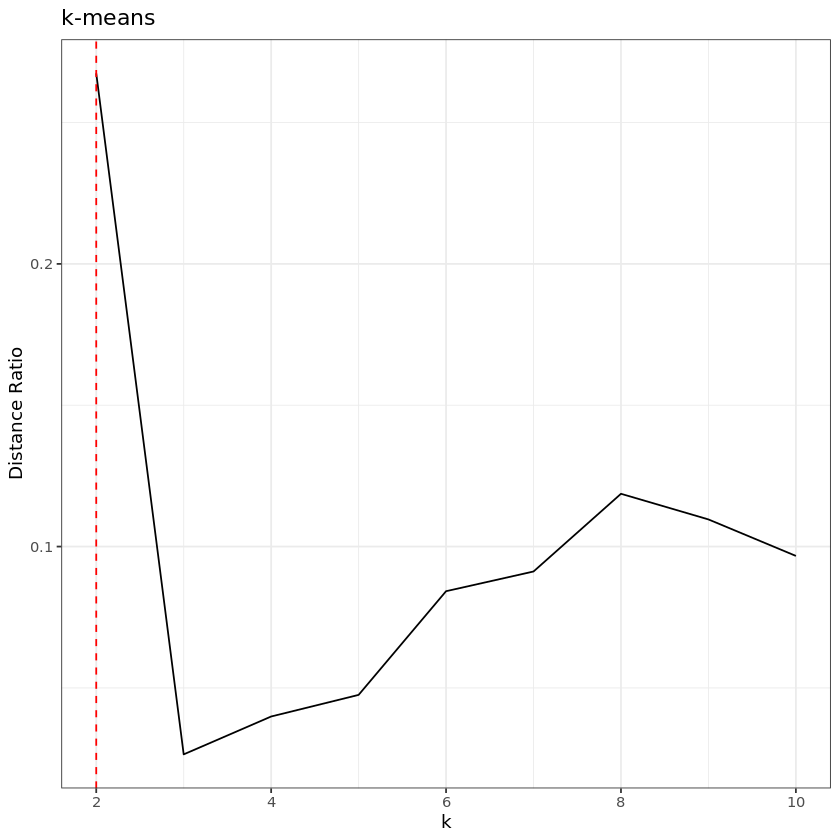

In [7]:
plot_dunn_kmeans <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmeans, 
                                   geom = 'line', 
                                   main = 'k-means', 
                                   xlab = 'k', 
                                   ylab = 'Distance Ratio')

plot_dunn_kmeans <- plot_dunn_kmeans  + 
  theme_bw() + #ylim(0,0.3) + 
  geom_vline(xintercept = range_k[which.max(dunn_kmeans)],
             linetype = 2, color='red')   
#ggsave(filename = "../../images/enh/dunn_kmeans_2_15.png", dpi = 300)

plot_dunn_kmeans

In [8]:
kmeans <- stats::kmeans(x = data, 
                        centers = range_k[which.max(dunn_kmeans)], 
                        nstart = 25)

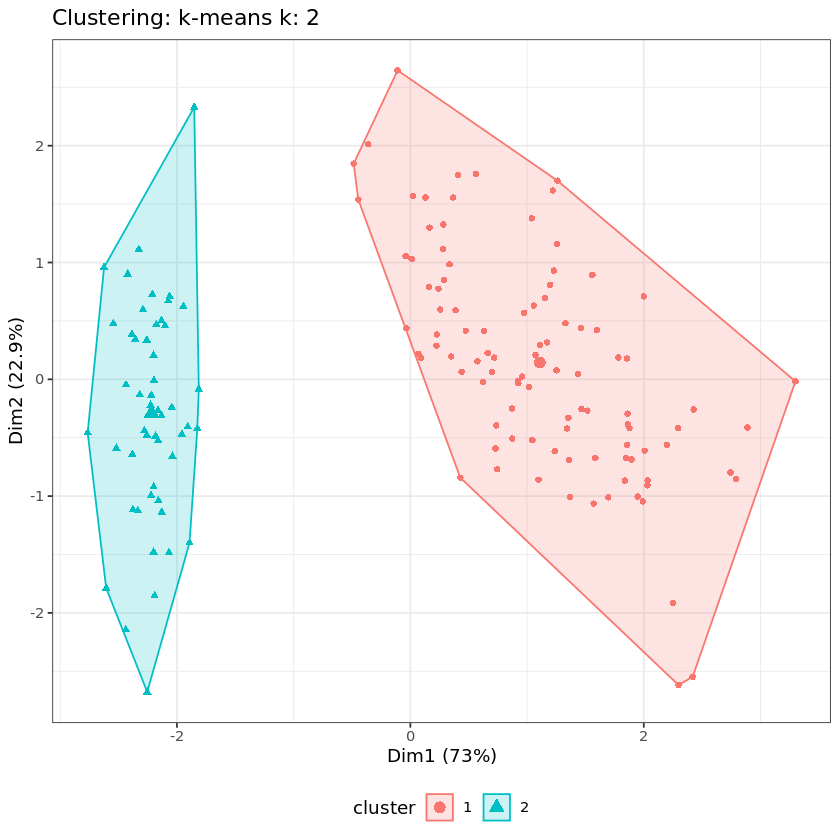

In [9]:
plot_kmeans <- factoextra::fviz_cluster(object = kmeans,
                                        data = data,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Clustering: k-means k:', range_k[which.max(dunn_kmeans)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)

plot_kmeans <- plot_kmeans + 
  theme_bw() +
  theme(legend.position = 'bottom')  

plot_kmeans